In [1]:
# LOAD LIBRARIES

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import os

In [2]:
# LOAD DATASETS:

# Read covid cases from Colombia dataset
df = pd.read_csv("datasets/Casos_positivos_de_COVID-19_en_Colombia_18_04.csv", low_memory=False) # 17-March Data, but it is download on sunday 18
df.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


In [3]:
df.iloc[-1:] # this line show the last case in this dataset

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
2636075,17/4/2021 0:00:00,2636116,10/4/2021 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,26,1,F,...,NaN,NaN,Activo,6/4/2021 0:00:00,NaN,14/4/2021 0:00:00,NaN,NaN,NaN,NaN


In [4]:
# Load geo dataset
fp = "datasets/shapefile/MGN_DPTO_POLITICO.shp"
map_df = gpd.read_file(fp)

In [6]:
# Load geo dataset
fp = "datasets/shapefile/MGN_DPTO_POLITICO.shp"
map_df = gpd.read_file(fp)
map_df.head()

,DPTO_CCDGO,DPTO_CNMBR,DPTO_NANO_,DPTO_CACTO,DPTO_NANO,SHAPE_AREA,SHAPE_LEN,geometry
0,18,CAQUETÁ,1981,Ley 78 del 29 de Diciembre de 1981,2020,7.318485,21.384287,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
1,19,CAUCA,1857,15 de junio de 1857,2020,2.534419,13.950263,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870..."
2,86,PUTUMAYO,1991,Articulo 309 Constitucion Politica de 1991,2020,2.107965,12.707922,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730..."
3,76,VALLE DEL CAUCA,1910,Decreto No 340 de 16 de Abril de 1910,2020,1.679487,12.650870,"MULTIPOLYGON (((-76.07931 5.04469, -76.07938 5..."
4,94,GUAINÍA,1991,Articulo 309 Constitucion Politica de 1991,2020,5.747937,21.179051,"POLYGON ((-67.67638 3.91228, -67.67305 3.90931..."


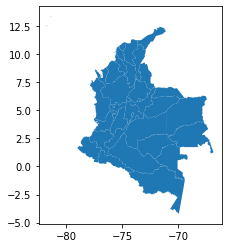

In [7]:
map_df.plot()

In [8]:
# CLEAN DATASETS:

# a) In this part clean covid dataset

# Change "Fecha de diagnostico" from str to datetime
df["fecha reporte web"] = pd.to_datetime(df["fecha reporte web"], dayfirst=True)

# Merge cities that not have departament
col_dep = df["Nombre departamento"].replace(["CARTAGENA","BARRANQUILLA", "STA MARTA D.E."], ["BOLIVAR","ATLANTICO","MAGDALENA"])
df["Nombre departamento"] = col_dep

In [9]:
# b) In this part clean geo dataset

# Remove accent mark
map_df["DPTO_CNMBR"] = map_df['DPTO_CNMBR'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Modify departament names (Some names are misspelled but this doesn't matter)
geo_col_dep = map_df["DPTO_CNMBR"].replace(["NARINO","ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA","BOGOTA, D.C.", "NORTE DE SANTANDER","LA GUAJIRA","VALLE DEL CAUCA"], 
                                           ["NARIÑO","SAN ANDRES","BOGOTA","NORTE SANTANDER","GUAJIRA","VALLE"])
map_df["DPTO_CNMBR"] = geo_col_dep

# c) Check that the departament names in both datasets are the same
print("Departamentos geodataset:\n\n", map_df["DPTO_CNMBR"],"\nTotal:", map_df["DPTO_CNMBR"].count())
print("\nDepartamentos covid dataset:\n\n", df["Nombre departamento"].unique(), "\nTotal:", len(df["Nombre departamento"].unique()))

Departamentos geodataset:

 0             CAQUETA
1               CAUCA
2            PUTUMAYO
3               VALLE
4             GUAINIA
5             VICHADA
6            CASANARE
7            AMAZONAS
8              VAUPES
9            GUAVIARE
10             CALDAS
11            QUINDIO
12          RISARALDA
13          ANTIOQUIA
14              CHOCO
15             NARIÑO
16            CORDOBA
17            BOLIVAR
18              CESAR
19            GUAJIRA
20          MAGDALENA
21              SUCRE
22         SAN ANDRES
23             ARAUCA
24             BOYACA
25       CUNDINAMARCA
26    NORTE SANTANDER
27             BOGOTA
28               META
29              HUILA
30          SANTANDER
31             TOLIMA
32          ATLANTICO
Name: DPTO_CNMBR, dtype: object 
Total: 33

Departamentos covid dataset:

 ['BOGOTA' 'VALLE' 'ANTIOQUIA' 'BOLIVAR' 'HUILA' 'META' 'RISARALDA'
 'NORTE SANTANDER' 'CALDAS' 'CUNDINAMARCA' 'ATLANTICO' 'SANTANDER'
 'QUINDIO' 'TOLIMA' 'CAUCA' 'MAGDALEN

In [10]:
# TOTAL CASES VISUALIZATION:

# Count total cases by departament
total_cases_df = df.groupby(["Nombre departamento"]).count()
total_cases_df

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Nombre departamento,,,,,,,,,,,,,,,,,,,,,
AMAZONAS,6040,6040,6040,6040,6040,6040,6040,6040,6040,6040,...,141,149,6030,5706,252,5928,5749,5749,6021,1996
ANTIOQUIA,431199,431199,431199,431199,431199,431199,431199,431199,431199,431199,...,848,848,430302,429698,9270,430760,394956,394956,424488,1443
ARAUCA,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,...,17,17,6014,6025,215,6041,5634,5634,5996,56
ATLANTICO,201540,201540,201540,201540,201540,201540,201540,201540,201540,201540,...,64,64,200824,198758,6524,199741,181588,181588,195464,3729
BOGOTA,732872,732872,732872,732872,732872,732872,732872,732872,732872,732872,...,939,939,730774,519616,17552,732647,685136,685136,725002,6010
BOLIVAR,74095,74095,74095,74095,74095,74095,74095,74095,74095,74095,...,40,40,73884,73471,1725,73614,70866,70866,73284,1513
BOYACA,50156,50156,50156,50156,50156,50156,50156,50156,50156,50156,...,17,17,49939,49596,1427,50148,47640,47640,49745,166
CALDAS,55243,55243,55243,55243,55243,55243,55243,55243,55243,55243,...,48,48,54972,54281,1377,55231,51279,51279,54314,1232
CAQUETA,17299,17299,17299,17299,17299,17299,17299,17299,17299,17299,...,4,4,17184,16906,780,17296,16447,16447,17283,291


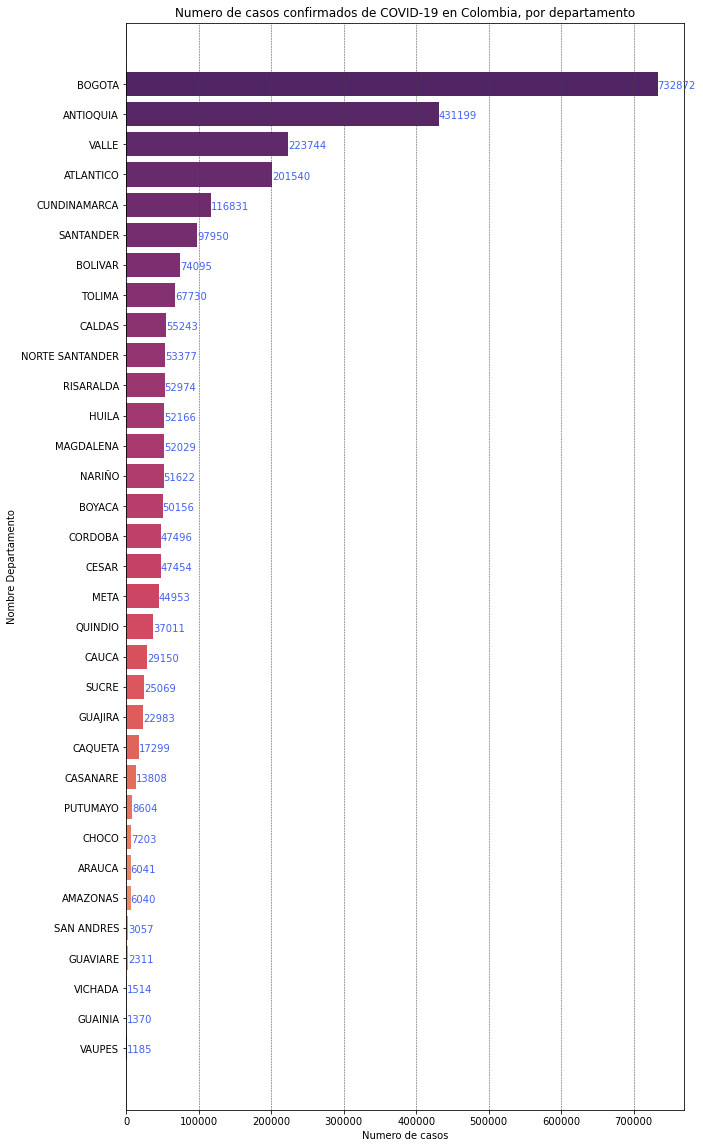

In [11]:
# Plot total cases by departament
plt.figure(figsize=[10,20])

# Make a series for best manipulation
index_total_cases_ser = total_cases_df.index
data_total_cases_ser = total_cases_df["ID de caso"]

total_cases_ser = pd.Series(data=data_total_cases_ser, index=index_total_cases_ser).sort_values(ascending=False)

bar = plt.barh(total_cases_ser.index, total_cases_ser.values, align='center', linewidth=0, color=sns.color_palette("flare_r", 32))
plt.title("Numero de casos confirmados de COVID-19 en Colombia, por departamento")
plt.grid(axis='x',linestyle="--", linewidth=0.5, color='.25', zorder=-10)

# ax = plt.gca()
plt.gca().invert_yaxis()
plt.gca().set_ylabel('Nombre Departamento')
plt.gca().set_xlabel('Numero de casos')

for index, value in enumerate(data_total_cases_ser.sort_values(ascending=False)):
    plt.gca().text(value+3, index+0.15, str(value), color='#4361ee')

In [12]:
# Find cases by month
series_list = []
index_list = []

for group, frame in df.groupby('Nombre departamento'):
    departament_name = group
    cases = frame["fecha reporte web"].groupby([frame["fecha reporte web"].dt.year.rename('year'), frame["fecha reporte web"].dt.month.rename('month')]).agg('count')
    
    index_list.append(departament_name)
    series_list.append(cases)

df_departament_month = pd.DataFrame(series_list, index = index_list)
df_departament_month

year              2020                                                       \
month               3       4       5        6        7         8        9    
AMAZONAS           NaN   104.0  1746.0    450.0    209.0     191.0     43.0   
ANTIOQUIA        101.0   331.0   672.0   3329.0  28335.0   48222.0  34192.0   
ARAUCA             NaN     NaN     1.0     75.0    139.0     714.0    801.0   
ATLANTICO         33.0   280.0  3620.0  19441.0  28944.0   11773.0   3434.0   
BOGOTA           383.0  2229.0  7394.0  20026.0  71953.0  109354.0  57817.0   
BOLIVAR           42.0   252.0  2897.0   5943.0   9107.0    7034.0   3588.0   
BOYACA             6.0    33.0   172.0    157.0    650.0    2791.0   3532.0   
CALDAS            15.0    54.0    65.0    125.0    695.0    1989.0   3005.0   
CAQUETA            NaN     8.0    16.0     11.0    903.0    5135.0   2413.0   
CASANARE           1.0    17.0    17.0     31.0    242.0     751.0   1380.0   
CAUCA              9.0    27.0    66.0    271.0   1549.0    3363.0   4208.0   
CESAR             11.0    44.0   198.0    772.0   2075.0    7711.0   9212.0   
CHOCO              NaN    13.0   213.0   1317.0   1451.0     727.0    274.0   
CORDOBA            2.0    24.0    98.0    673.0   4875.0   14284.0   4166.0   
CUNDINAMARCA      44.0   199.0   588.0   1859.0   5797.0   14600.0  10418.0   
GUAINIA            NaN     NaN     6.0      8.0      2.0     125.0    732.0   
GUAJIRA            1.0     8.0    53.0    392.0   1656.0    3034.0   2996.0   
GUAVIARE           NaN     NaN     NaN     37.0     78.0     157.0    531.0   
HUILA             24.0    96.0   129.0     91.0    551.0    4276.0   6578.0   
MAGDALENA         10.0   192.0   411.0   1239.0   4304.0    6309.0   2892.0   
META              11.0   360.0   604.0    276.0   1506.0    6212.0   7273.0   
NARIÑO             4.0   114.0   984.0   2341.0   4523.0    6106.0   4241.0   
NORTE SANTANDER   19.0    50.0    59.0    207.0   2008.0    9508.0   3951.0   
PUTUMAYO           NaN     NaN     9.0     19.0    895.0    1977.0    895.0   
QUINDIO           16.0    43.0    52.0     56.0    180.0     992.0   2433.0   
RISARALDA         34.0   165.0    56.0    256.0   1126.0    4568.0   5035.0   
SAN ANDRES         1.0     5.0    11.0      6.0     14.0     181.0   1256.0   
SANTANDER         11.0    29.0    29.0    643.0   3039.0   14461.0  13063.0   
SUCRE              1.0     NaN    20.0   1223.0   4525.0    5778.0   2366.0   
TOLIMA             9.0    58.0   195.0    673.0   1631.0    4657.0   5171.0   
VALLE            117.0   825.0  2524.0   6507.0  14667.0   22310.0  15753.0   
VAUPES             NaN     NaN    11.0     17.0     33.0     279.0    429.0   
VICHADA            NaN     NaN     1.0      NaN      1.0      92.0    432.0   

year                                            2021                    \
month                 10       11       12        1        2        3    
AMAZONAS           165.0    241.0     96.0     451.0   1398.0    765.0   
ANTIOQUIA        54252.0  44513.0  47663.0   64383.0  18978.0  29654.0   
ARAUCA            1621.0    730.0    500.0     749.0    243.0    178.0   
ATLANTICO         4326.0   6266.0  15825.0   21091.0   8493.0  28053.0   
BOGOTA           52459.0  53666.0  95807.0  143327.0  43531.0  29425.0   
BOLIVAR           4139.0   5457.0  13356.0   11726.0   3198.0   2848.0   
BOYACA            7064.0   7266.0   6870.0   13070.0   4476.0   2013.0   
CALDAS            7873.0  11351.0   7356.0   11526.0   2465.0   3104.0   
CAQUETA           2849.0   2059.0   1608.0    1543.0    477.0    163.0   
CASANARE          2630.0   1897.0   1812.0    2639.0    942.0    685.0   
CAUCA             3772.0   2531.0   2909.0    6957.0   1705.0    759.0   
CESAR             5948.0   3811.0   3779.0    4747.0   2089.0   2741.0   
CHOCO              198.0    331.0    353.0    1216.0    447.0    167.0   
CORDOBA           2223.0   1904.0   1354.0    3581.0   4038.0   5828.0   
CUNDINAMARCA      8935.0  10076.0  14680.0   27846

In [13]:
# Merge cases dataset with geo dataset, create last dataset plot dataframe
plot_df = pd.merge(df_departament_month, map_df.set_index("DPTO_CNMBR"), how='inner', left_index=True, right_index=True)

C:\Anaconda\envs\ML\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [14]:
#CLEAN DATAFRAME:

# Rename tuple columns (this because the warning showing up, the multi-index columns is merged in tuples)
columns_name = plot_df.columns
new_columns_name = ['-'.join(tuple("0"+str(x) if len(str(x)) <= 1 else str(x) for x in name)) 
                    if type(name) is tuple else name for name in columns_name]
column_dict = dict(zip(columns_name, new_columns_name))

plot_df.rename(columns=column_dict, inplace=True)

# Fill NaN that appears in certain columns
plot_df.fillna(0, inplace = True)

# Transform dataframe to geodataframe
print(type(plot_df))
geo_plot_df = gpd.GeoDataFrame(plot_df, geometry='geometry')
print(type(geo_plot_df))

<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [15]:
# Check the Mean and Std
mean_data = plot_df.mean(axis=1).mean()
std_data = plot_df.std(axis=1).mean()
mean_data+std_data

9598.421424679958

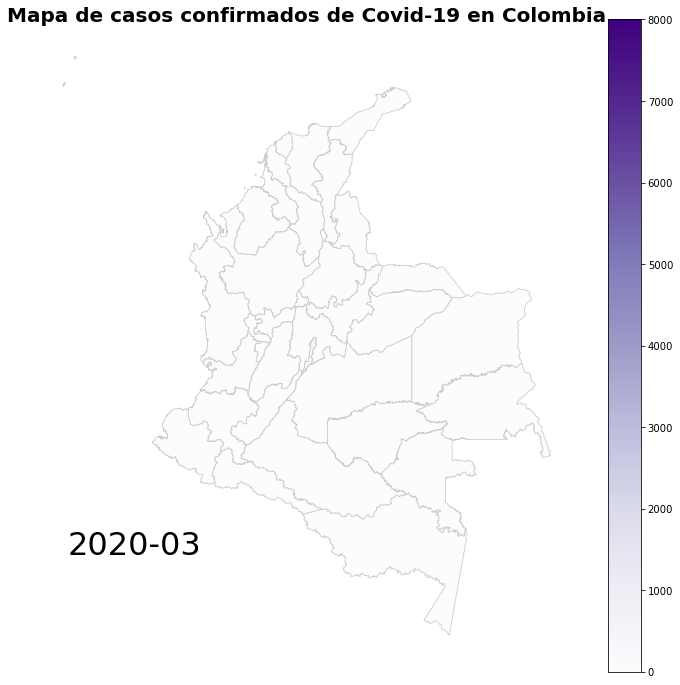

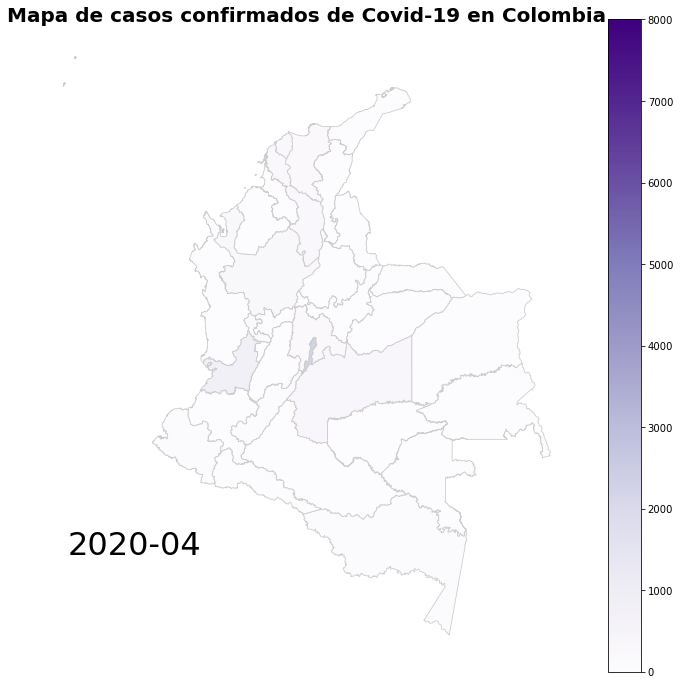

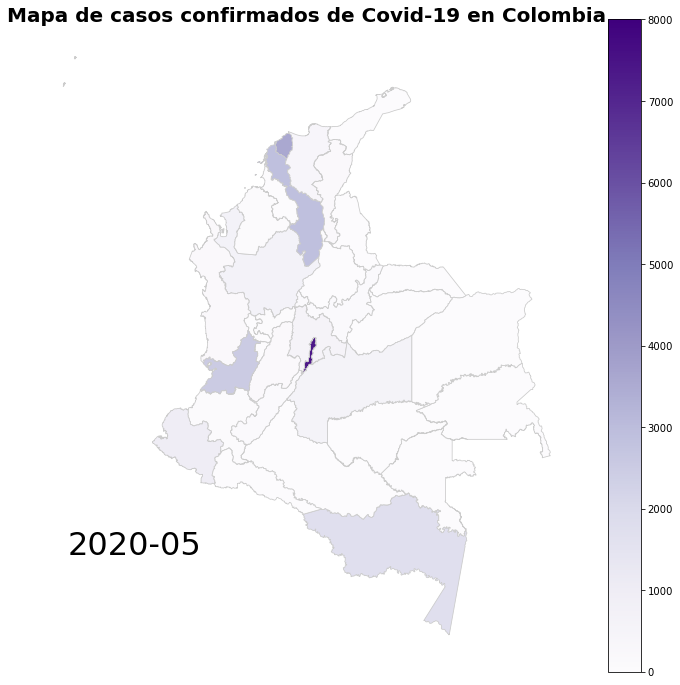

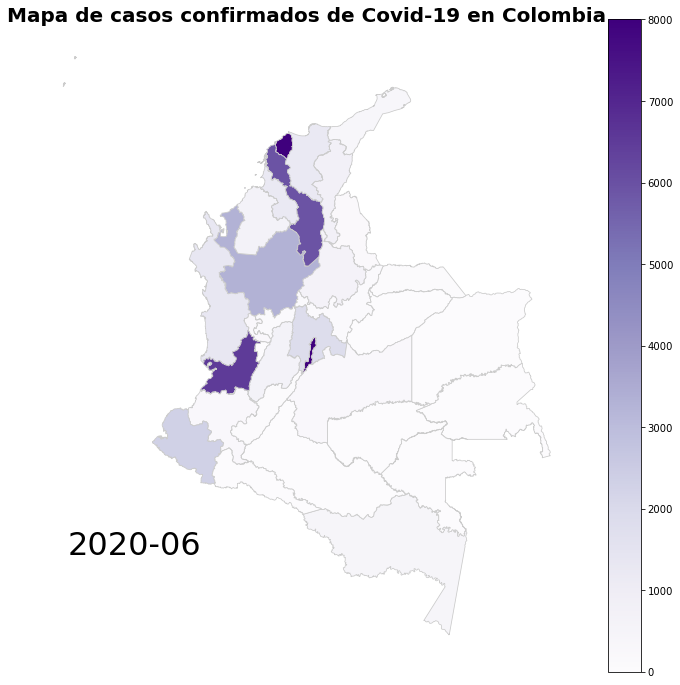

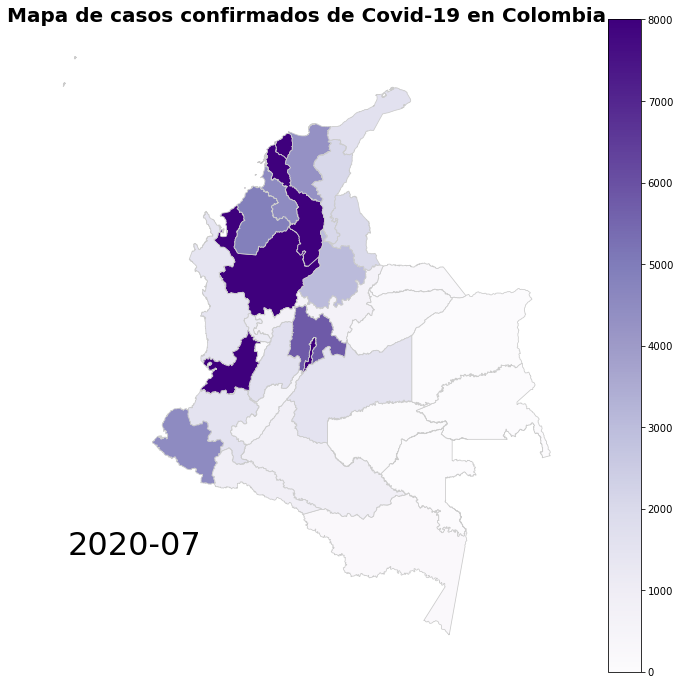

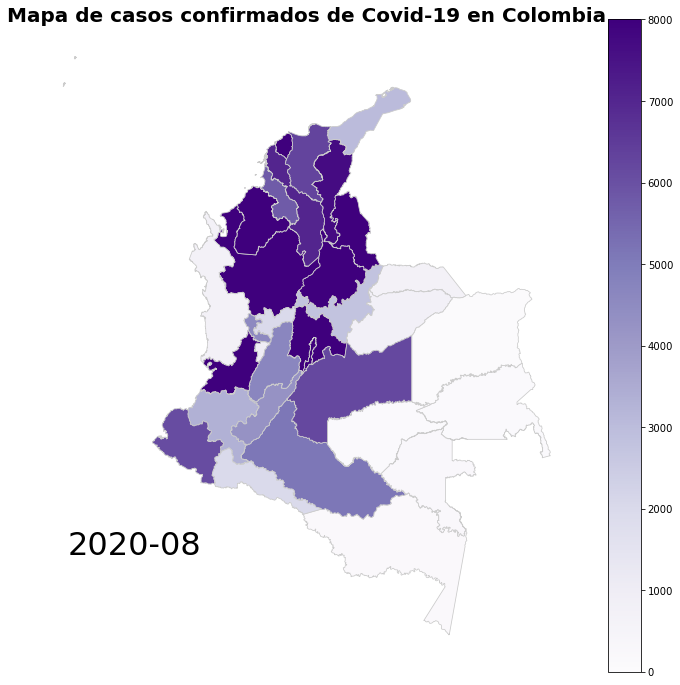

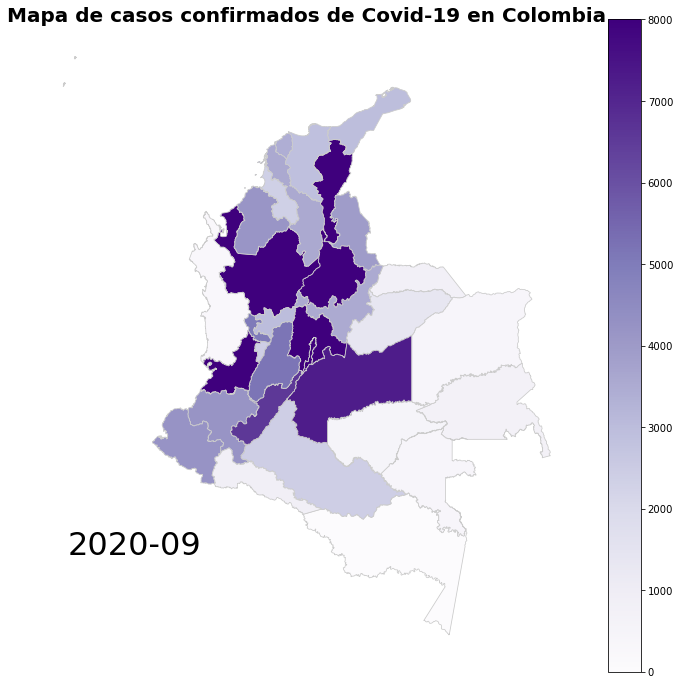

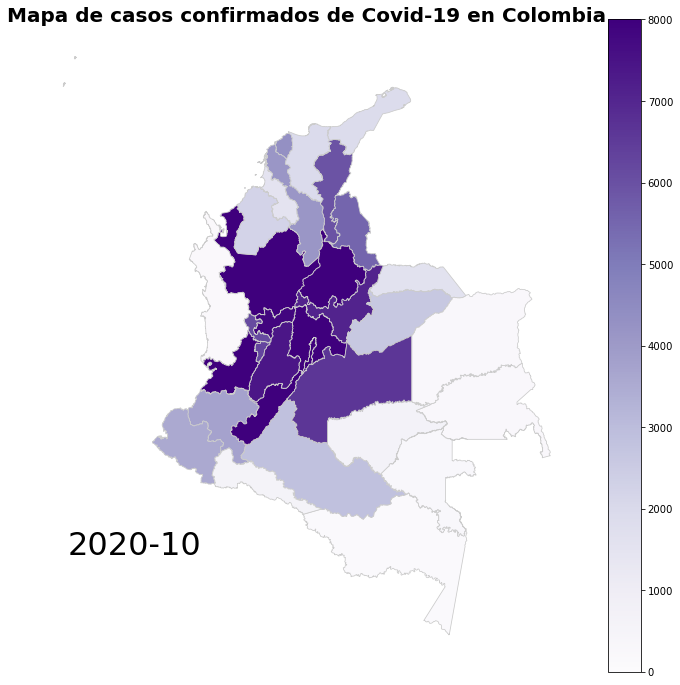

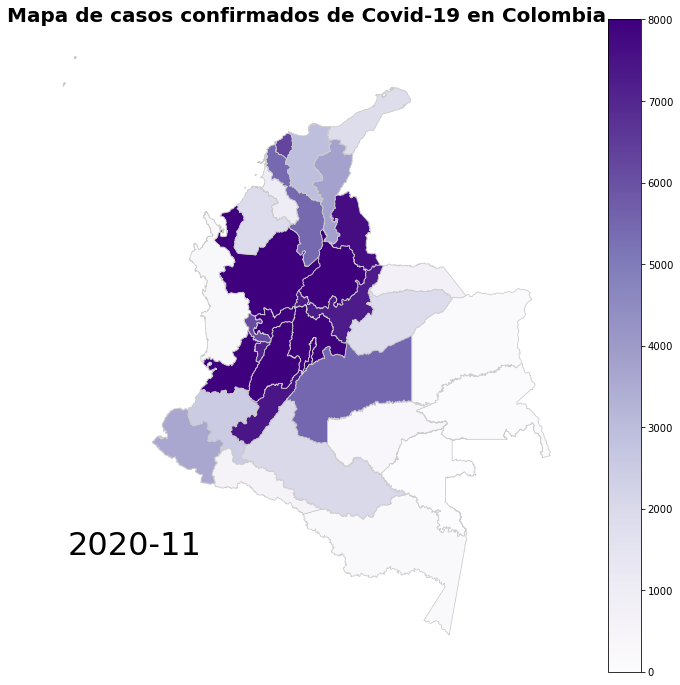

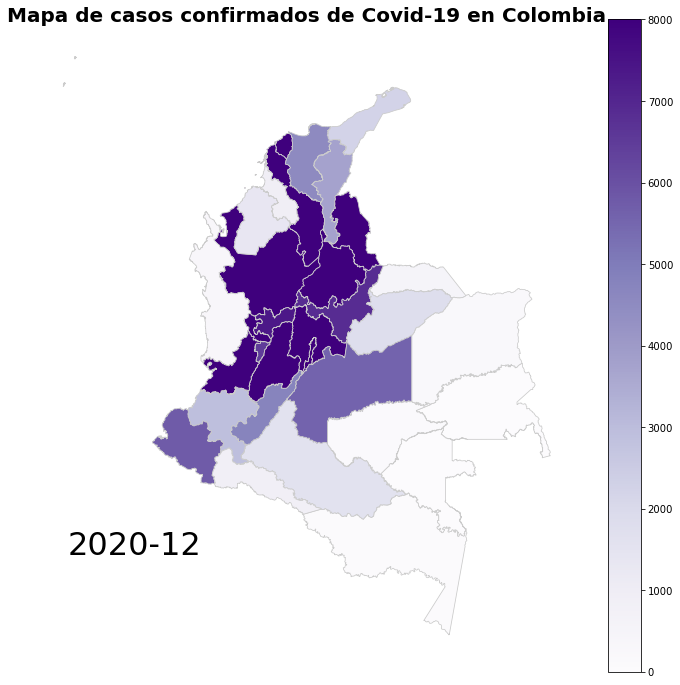

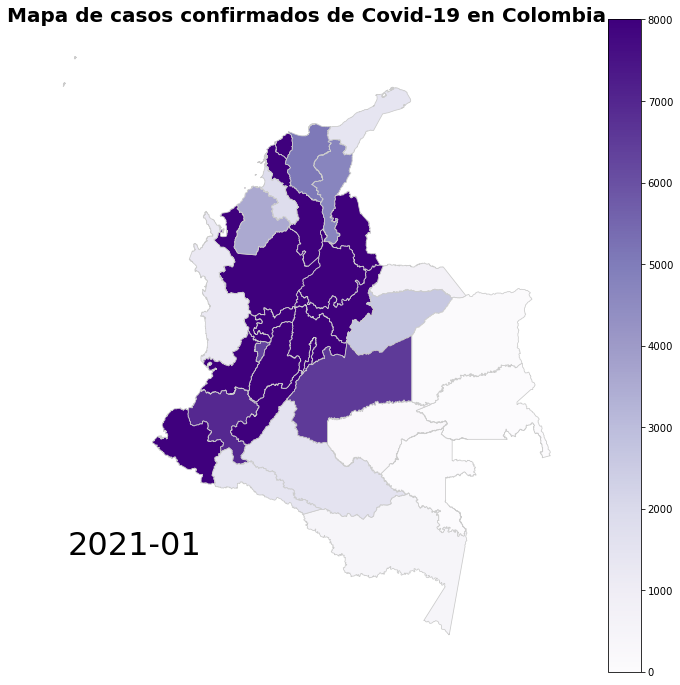

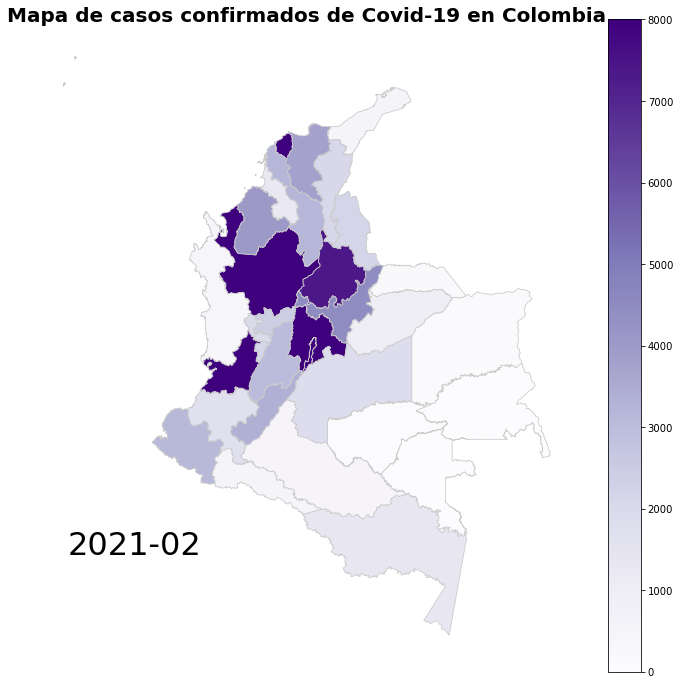

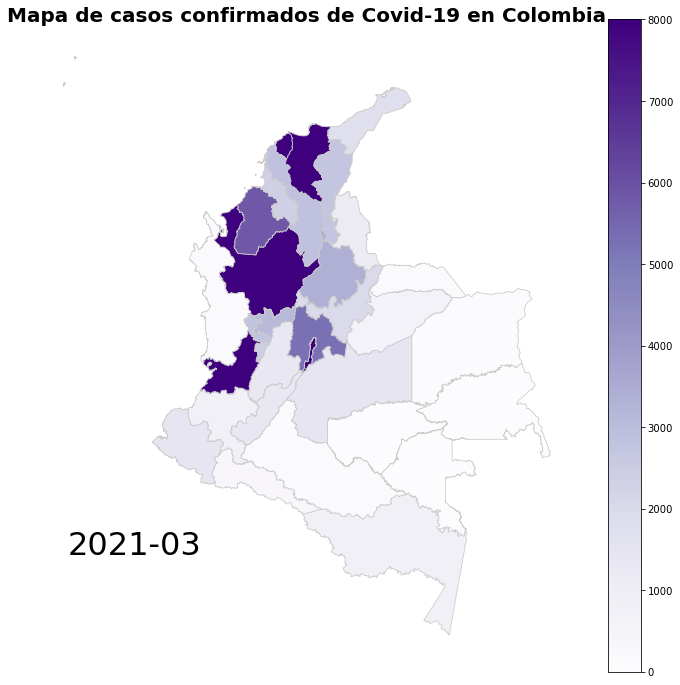

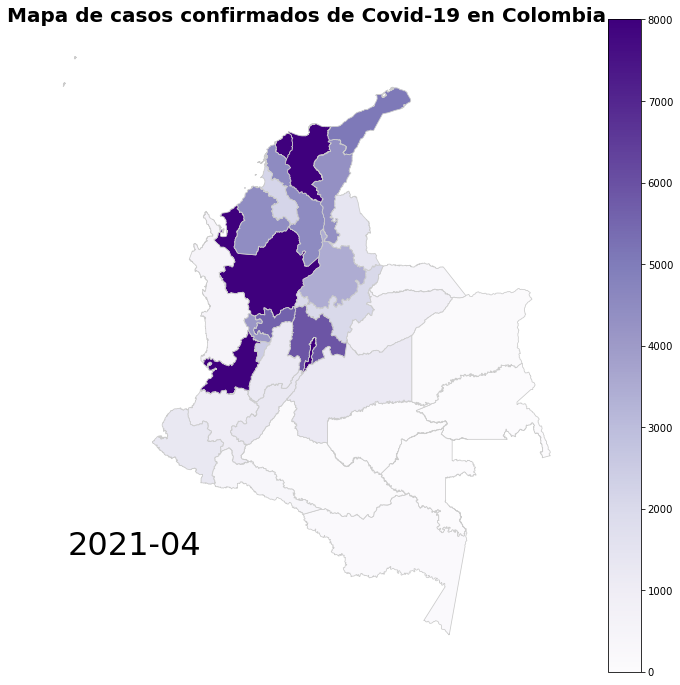

In [16]:
# CREATE CHART FOR EVERY MONTH:

# Save path
output_path = "charts/maps"

# Month on the dataframe
month_list = []
for month in new_columns_name:
    if month == "DPTO_CCDGO":
        break
    else:
        month_list.append(month)

# Min and max for the color map
vmin, vmax = 0, 8000  #TODO: Check the mean and std to get best vmax

# Create map for month
i = 0

for month in month_list:
    
    # create map
    fig = geo_plot_df.plot(column=month, cmap='Purples', figsize=(12,12), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))#, legend_kwds={'label': "Numero de casos"}
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title("Mapa de casos confirmados de Covid-19 en Colombia", fontdict={'fontsize': '20', 'fontweight' : 'bold'})
    
    # position the annotation to the bottom left
    fig.annotate(month,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=32)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, month+'_Covid19.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [18]:
# MAKING GIF

import imageio
from pathlib import Path

image_path = Path()

images = list(image_path.glob('charts/maps/*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))
    #os.remove(file_name)
    print(file_name)
    
imageio.mimwrite('charts/gifs/2021-4_1200ms_8000max.gif', image_list, fps=1.2) # The name is structured as follows: year-month_fpsinms_maxcolormaprange.gif


charts\maps\2020-03_Covid19.png
charts\maps\2020-04_Covid19.png
charts\maps\2020-05_Covid19.png
charts\maps\2020-06_Covid19.png
charts\maps\2020-07_Covid19.png
charts\maps\2020-08_Covid19.png
charts\maps\2020-09_Covid19.png
charts\maps\2020-10_Covid19.png
charts\maps\2020-11_Covid19.png
charts\maps\2020-12_Covid19.png
charts\maps\2021-01_Covid19.png
charts\maps\2021-02_Covid19.png
charts\maps\2021-03_Covid19.png
charts\maps\2021-04_Covid19.png
